## Waste Classification Model

Author : Pradeeshkumar U, 
Date   : 21-01-2025, 

Importing the Basic Libraries:

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

Creating File Paths:

In [3]:
train_path = 'Dataset/TRAIN'
test_path = 'Dataset/TEST'

Importing TensorFlow Libraries:

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Conv2D,Flatten,BatchNormalization,MaxPooling2D,Dropout,Dense
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator,load_img 
from tensorflow.keras.utils import plot_model
from glob import glob

Data Visualization:

In [5]:
x_train = []
y_train = []

for type in glob(train_path+'/*'):
    for img_file in tqdm(glob(type+'/*')):
        img_array = cv2.cvtColor(cv2.imread(img_file),cv2.COLOR_BGR2RGB)
        x_train.append(img_array)
        y_train.append(type.split('/')[-1][-1])
        
        
data = pd.DataFrame({'Image':x_train,'Type':y_train})

100%|██████████| 9999/9999 [00:05<00:00, 1741.29it/s]


In [6]:
data.head()

,Image,Type
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",O
1,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",O
2,"[[[224, 224, 224], [229, 229, 229], [236, 236,...",O
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",O
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",O


In [7]:
data.tail()

,Image,Type
22559,"[[[212, 204, 202], [212, 204, 202], [212, 204,...",R
22560,"[[[205, 204, 202], [205, 204, 202], [205, 204,...",R
22561,"[[[136, 136, 144], [136, 136, 144], [137, 137,...",R
22562,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
22563,"[[[242, 240, 241], [242, 240, 241], [242, 240,...",R


In [8]:
data.shape

(22564, 2)

In [9]:
data['Type'].value_counts()

Type
O    12565
R     9999
Name: count, dtype: int64

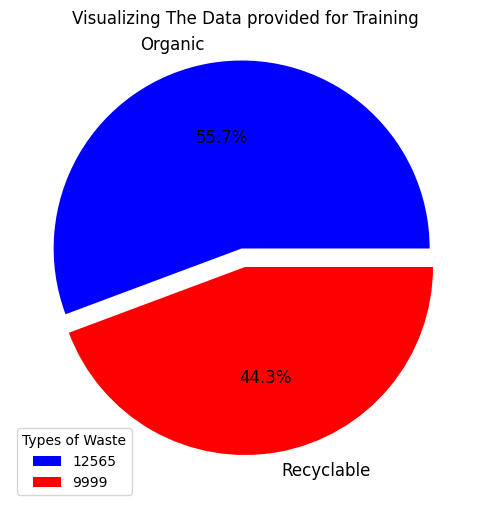

In [14]:
plt.figure(figsize=(5,12))
plt.pie(data['Type'].value_counts(),labels=['Organic','Recyclable'],colors=['blue','red'],explode=(0.1,0),textprops={'fontsize':12},autopct='%0.1f%%')
plt.title('Visualizing The Data provided for Training')
plt.legend(data['Type'].value_counts(),title = 'Types of Waste',loc = 'best')
plt.tight_layout()
plt.show()

Accidentaly created Pepsi Logo :)